In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper
import os
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import KMeans
import warnings; warnings.simplefilter('ignore')

from sklearn.datasets import load_digits
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import decomposition
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import sys



In [5]:
movies = pd.read_csv('movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


In [8]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

     rating  rating
1      4.31    4.22
2      4.50    3.88
3      0.50    4.20
4      3.38    2.83
5      3.09    2.50
6      3.61    3.48
7      2.65    3.15
8      3.50    3.25
9      3.17    3.00
10     3.33    2.00
11     4.23    3.50
12     4.57    4.50
13     3.67    4.20
14     3.57    3.50
15     3.88    3.58
16     3.65    3.69
17     3.93    4.40
18     3.68    3.64
19     2.68    2.56
20     3.99    3.23
21     3.24    3.45
22     2.20    2.10
23     3.33    3.91
24     3.55    3.64
25     5.00    4.72
26     3.00    2.00
27     4.13    3.38
28     2.89    3.18
29     4.33    4.11
30     5.00    4.65
..      ...     ...
581    4.22    4.28
582    3.83    3.94
583    3.44     NaN
584    4.35    4.23
585    4.25    3.25
586    4.14    4.40
587    4.13    4.23
588    3.00    2.67
589    4.57    4.33
590    3.44    3.20
591    3.12    3.64
592    4.07    3.87
593    3.35    3.08
594    4.52    4.30
595    4.33    4.50
596    3.55    3.50
597    3.89    3.85
598    3.68    5.00


,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [9]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


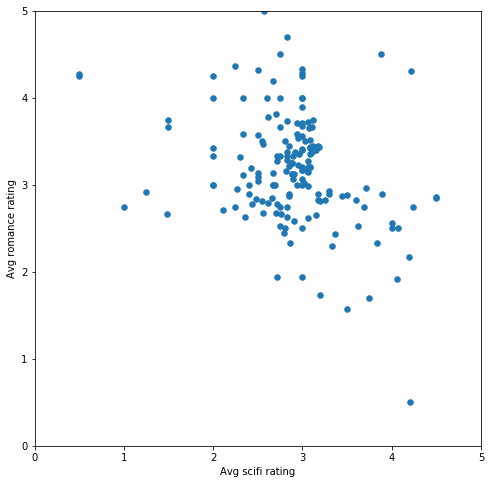

In [10]:
get_ipython().run_line_magic('matplotlib', 'inline')

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [11]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values


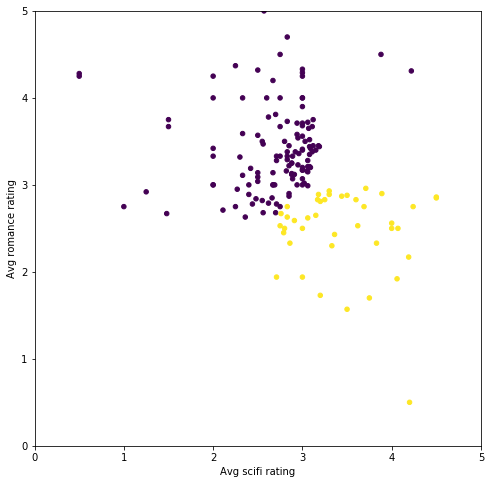

In [12]:
kmeans_1 = KMeans(n_clusters=2, random_state=0)
predictions = kmeans_1.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions)

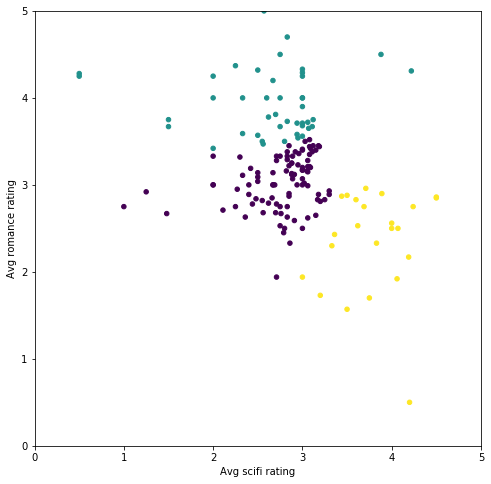

In [13]:
kmeans_2 = KMeans(n_clusters=3, random_state=1)
predictions_2 = kmeans_2.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions_2)


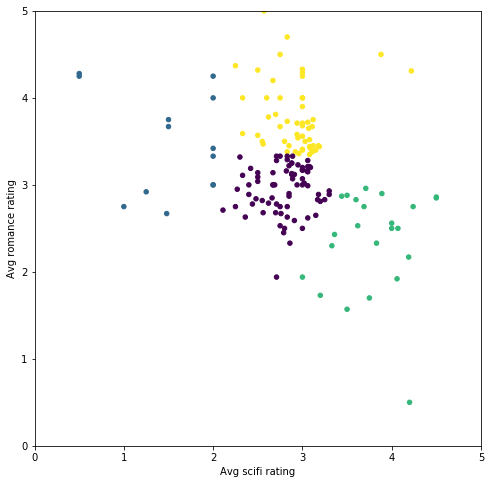

In [14]:
kmeans_3 = KMeans(n_clusters=4, random_state=3)
predictions_3 = kmeans_3.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions_3)

In [15]:
possible_k_values = range(2, len(X)+1, 5)

errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

In [16]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.37651376343962917),
 (7, 0.3808157793254106),
 (12, 0.37552415494926705),
 (17, 0.39116748137791457),
 (22, 0.3939064304895342),
 (27, 0.40938864858051777),
 (32, 0.41212395340286556),
 (37, 0.4139149337300908),
 (42, 0.4250799931325989),
 (47, 0.4048714577887541),
 (52, 0.3960547263010321),
 (57, 0.4054671721037033),
 (62, 0.410242435444305),
 (67, 0.38993066911258006),
 (72, 0.3894344183669608),
 (77, 0.3861557039100854),
 (82, 0.35747931976342334),
 (87, 0.3534499141783888),
 (92, 0.33338017588833396),
 (97, 0.3340958901727095),
 (102, 0.3114133068003393),
 (107, 0.28408898817958395),
 (112, 0.2735540826281534),
 (117, 0.2462241599787725),
 (122, 0.239366108714576),
 (127, 0.22933015714020014),
 (132, 0.21063694019217982),
 (137, 0.19485533237237704),
 (142, 0.1745705045298946),
 (147, 0.13831784871757571),
 (152, 0.10678588096581217),
 (157, 0.06172839506172839),
 (162, 0.06172839506172839)]

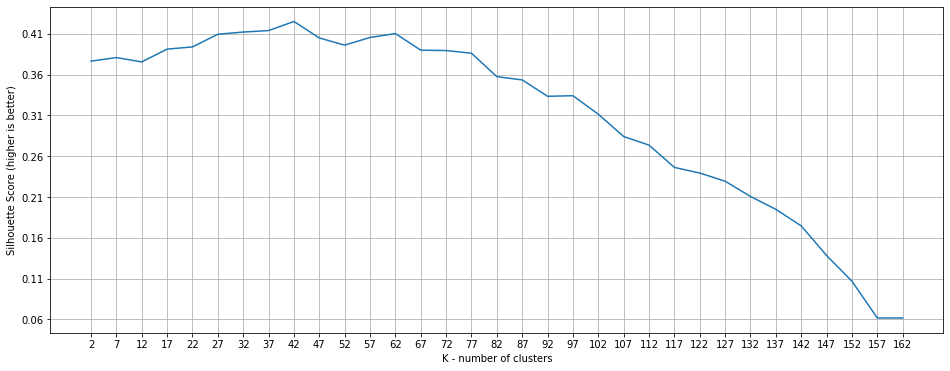

In [24]:

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)


xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

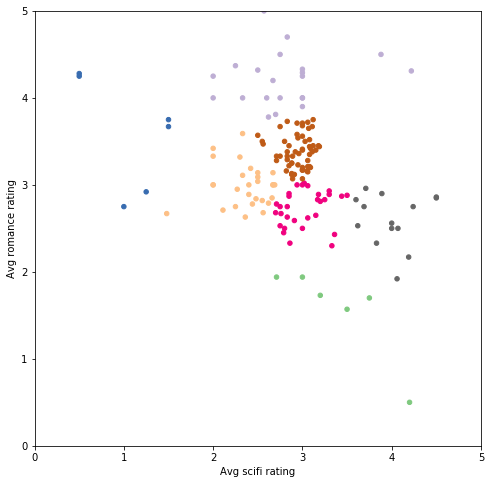

In [25]:
kmeans_4 = KMeans(n_clusters=7, random_state=6)
predictions_4 = kmeans_4.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent') 


In [26]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

     rating  rating  rating
1      4.31    4.22    4.32
2      4.50    3.88    3.95
3      0.50    4.20    3.57
4      3.38    2.83    3.32
5      3.09    2.50    3.11
6      3.61    3.48    3.61
7      2.65    3.15    3.26
8      3.50    3.25    3.33
9      3.17    3.00    3.12
10     3.33    2.00    3.50
11     4.23    3.50    3.54
12     4.57    4.50    4.00
13     3.67    4.20    4.20
14     3.57    3.50    3.33
15     3.88    3.58    3.20
16     3.65    3.69    3.52
17     3.93    4.40    4.23
18     3.68    3.64    3.59
19     2.68    2.56    2.73
20     3.99    3.23    2.76
21     3.24    3.45    3.46
22     2.20    2.10    2.78
23     3.33    3.91    3.54
24     3.55    3.64    3.64
25     5.00    4.72    4.83
26     3.00    2.00    3.00
27     4.13    3.38    3.64
28     2.89    3.18    3.06
29     4.33    4.11    4.02
30     5.00    4.65    4.72
..      ...     ...     ...
581    4.22    4.28    4.29
582    3.83    3.94    4.08
583    3.44     NaN    3.00
584    4.35    4.23 

,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


In [27]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

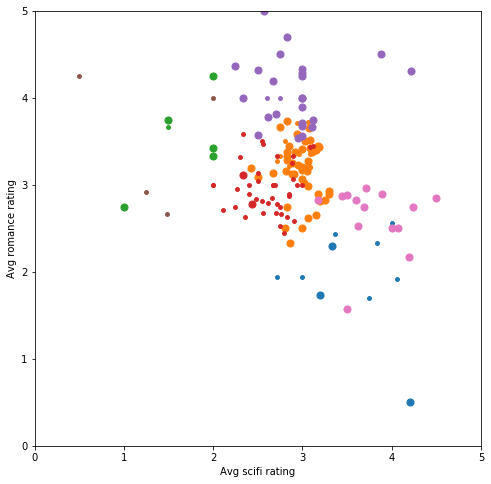

In [28]:

kmeans_5 = KMeans(n_clusters=7)
predictions_5 = kmeans_5.fit_predict(X_with_action)
helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)


In [29]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]


dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = helper.sort_by_rating_density(user_movie_ratings, n_movies, n_users)

print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()


dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


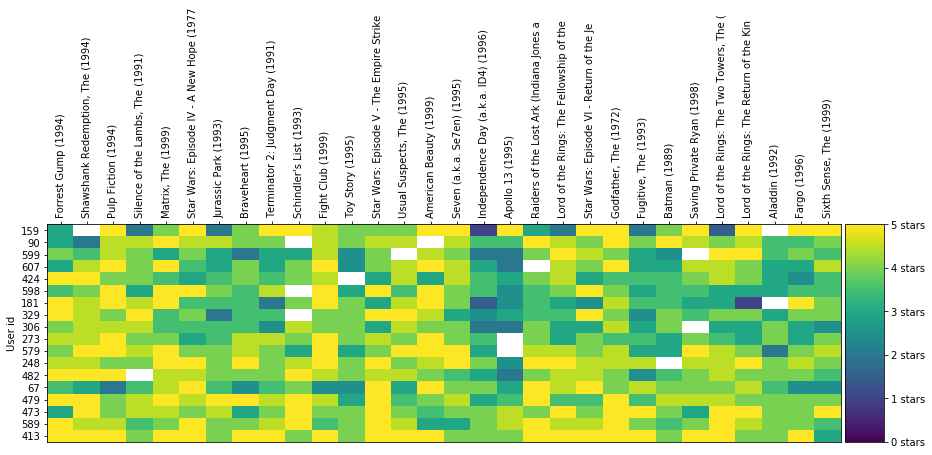

In [31]:
helper.draw_movies_heatmap(most_rated_movies_users_selection)

In [32]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = helper.get_most_rated_movies(user_movie_ratings, 1000)

In [33]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [34]:
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

cluster # 2
# of users in cluster: 50. # of users in plot: 50


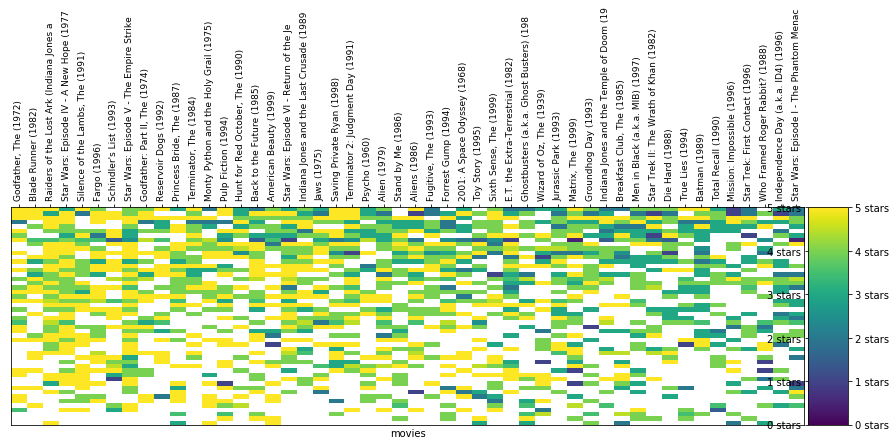

cluster # 4
# of users in cluster: 285. # of users in plot: 70


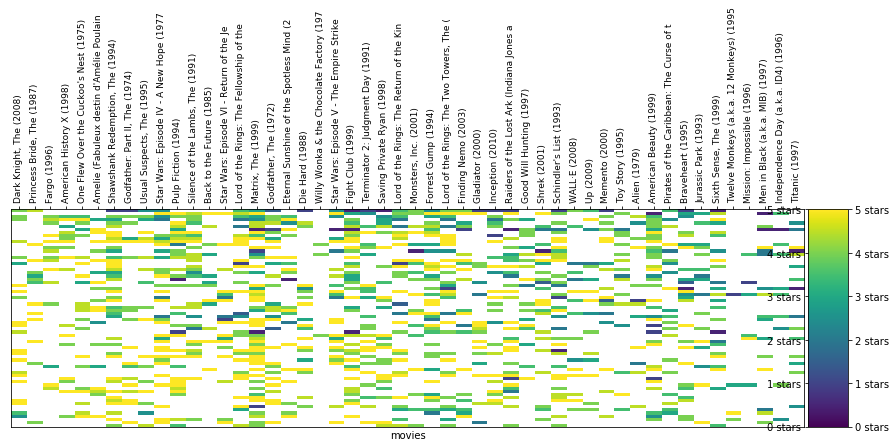

cluster # 19
# of users in cluster: 63. # of users in plot: 63


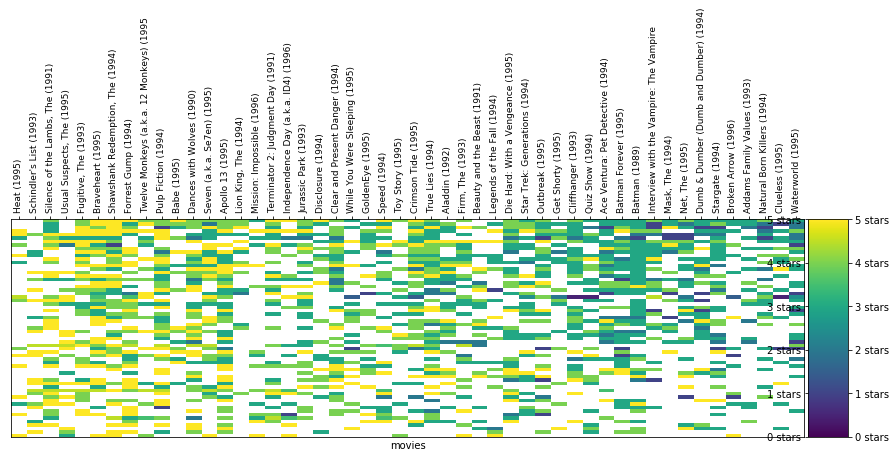

cluster # 10
# of users in cluster: 43. # of users in plot: 43


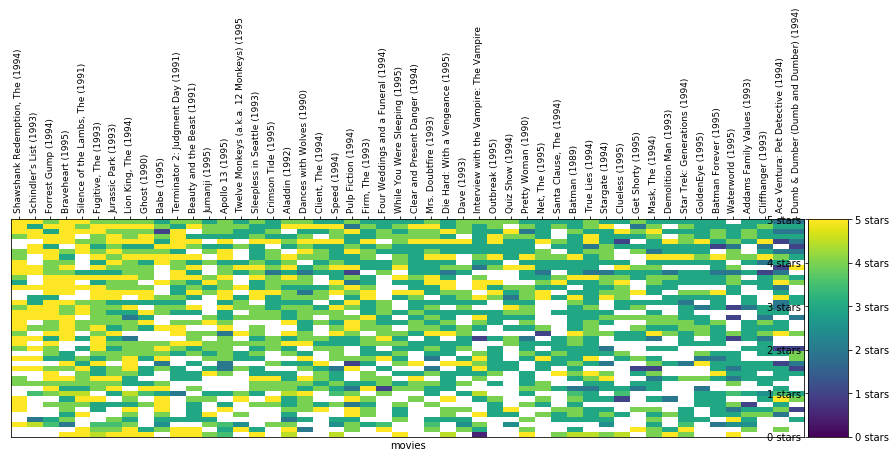

cluster # 13
# of users in cluster: 83. # of users in plot: 70


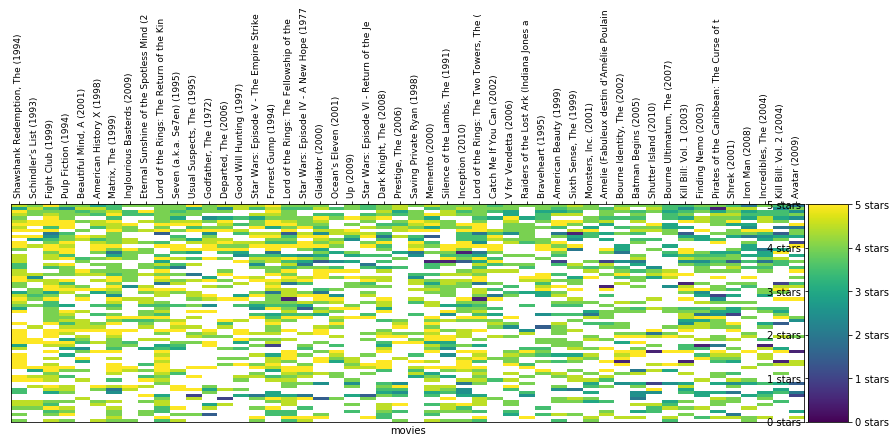

cluster # 16
# of users in cluster: 24. # of users in plot: 24


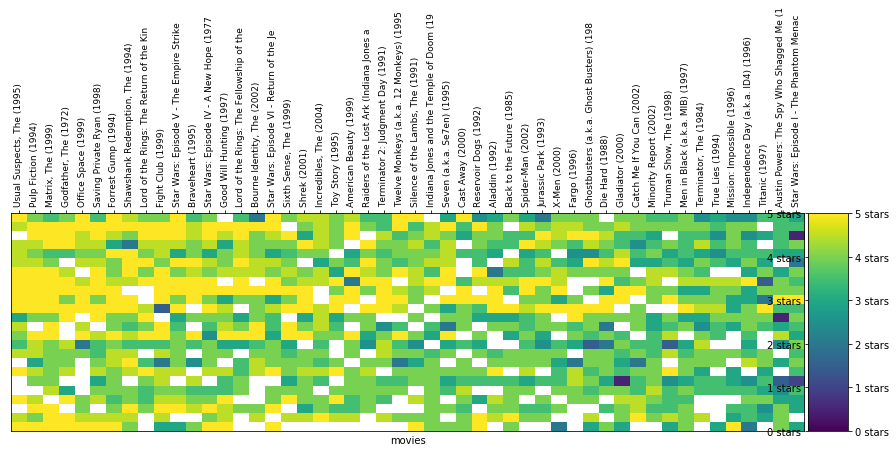

cluster # 0
# of users in cluster: 10. # of users in plot: 10


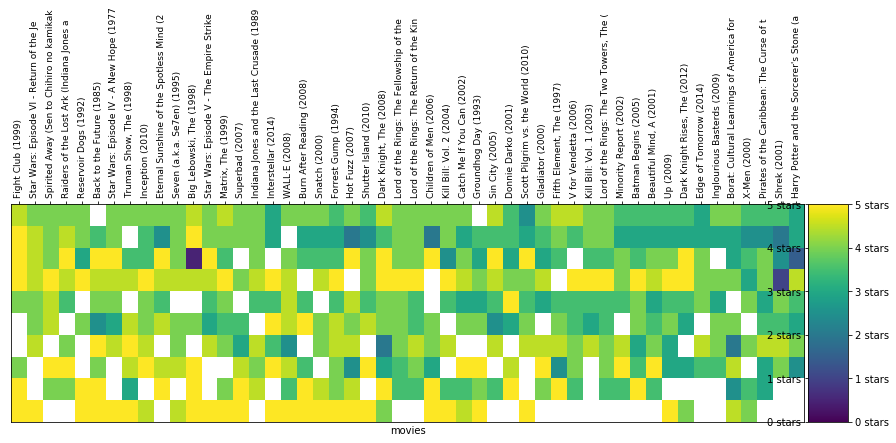

In [35]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)


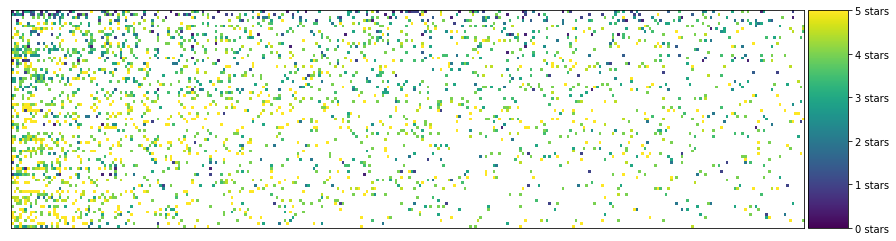

In [36]:
cluster_number = 4

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = helper.sort_by_rating_density(cluster, n_movies, n_users)
helper.draw_movies_heatmap(cluster, axis_labels=False)

In [37]:
cluster.fillna('').head()

,"Matrix, The (1999)","Shawshank Redemption, The (1994)",Forrest Gump (1994),Star Wars: Episode IV - A New Hope (1977),Fight Club (1999),American Beauty (1999),Pulp Fiction (1994),"Godfather, The (1972)",Schindler's List (1993),"Silence of the Lambs, The (1991)",...,Man on the Moon (1999),Mystery Science Theater 3000: The Movie (1996),"Patriot, The (2000)","Cable Guy, The (1996)",It's a Wonderful Life (1946),Grease (1978),Shutter Island (2010),The Imitation Game (2014),"Blues Brothers, The (1980)","Pianist, The (2002)"
60,0.5,,3.5,,0.5,3,3,1,2,,...,,,,,,1,,,,
138,3,1,2.5,2.5,0.5,,,1.5,1,,...,,,,,,,,,,
127,,,,,4,,,,4,,...,,4,,,,0.5,,,,
33,,,0.5,,,,,,,,...,,,,,,,,,,
284,,,3,5,,,2,,,,...,,,,,,,,,,


In [38]:
movie_name = 'Forrest Gump (1994)'

cluster[movie_name].mean()

3.864864864864865

In [39]:
cluster.mean().head(20)

Matrix, The (1999)                                                                3.921053
Shawshank Redemption, The (1994)                                                  4.125000
Forrest Gump (1994)                                                               3.864865
Star Wars: Episode IV - A New Hope (1977)                                         3.946429
Fight Club (1999)                                                                 3.716667
American Beauty (1999)                                                            3.851351
Pulp Fiction (1994)                                                               3.984375
Godfather, The (1972)                                                             3.955882
Schindler's List (1993)                                                           3.981481
Silence of the Lambs, The (1991)                                                  4.000000
Lord of the Rings: The Fellowship of the Ring, The (2001)                         3.750000

In [40]:
cluster.fillna('').head()

,"Matrix, The (1999)","Shawshank Redemption, The (1994)",Forrest Gump (1994),Star Wars: Episode IV - A New Hope (1977),Fight Club (1999),American Beauty (1999),Pulp Fiction (1994),"Godfather, The (1972)",Schindler's List (1993),"Silence of the Lambs, The (1991)",...,Man on the Moon (1999),Mystery Science Theater 3000: The Movie (1996),"Patriot, The (2000)","Cable Guy, The (1996)",It's a Wonderful Life (1946),Grease (1978),Shutter Island (2010),The Imitation Game (2014),"Blues Brothers, The (1980)","Pianist, The (2002)"
60,0.5,,3.5,,0.5,3,3,1,2,,...,,,,,,1,,,,
138,3,1,2.5,2.5,0.5,,,1.5,1,,...,,,,,,,,,,
127,,,,,4,,,,4,,...,,4,,,,0.5,,,,
33,,,0.5,,,,,,,,...,,,,,,,,,,
284,,,3,5,,,2,,,,...,,,,,,,,,,


In [42]:
%%capture output
user_id = int(input('Enter user id'))

user_2_ratings  = cluster.loc[user_id, :]

user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

pdf1_ = avg_ratings.sort_values(ascending=False)[:10]

print(pdf1_)


Enter user id11


In [43]:
prev_cell_output = str(output)
print(prev_cell_output)

Shutter Island (2010)                                                        5.000000
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    4.750000
Harry Potter and the Prisoner of Azkaban (2004)                              4.714286
Time to Kill, A (1996)                                                       4.500000
Jaws (1975)                                                                  4.500000
Blazing Saddles (1974)                                                       4.500000
Chinatown (1974)                                                             4.500000
E.T. the Extra-Terrestrial (1982)                                            4.500000
To Kill a Mockingbird (1962)                                                 4.450000
Taxi Driver (1976)                                                           4.416667
Name: 0, dtype: float64



In [45]:
prev_cell_output=list(prev_cell_output)
def convert(s): 
    str1 = "" 
    return(str1.join(s)) 

indices = [i for i, x in enumerate(prev_cell_output) if x == "\n"]
indices.insert(0,0)

pdf_list = []
temp=[]
for i in range(10):
    pdf_list.append([])

for j in range(10): 
    temp = prev_cell_output[indices[j]:indices[j+1]]
    pdf_list[j].append(convert(temp))
    temp=[]
            
print(pdf_list)


[['Shutter Island (2010)                                                        5.000000'], ['\nGood, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    4.750000'], ['\nHarry Potter and the Prisoner of Azkaban (2004)                              4.714286'], ['\nTime to Kill, A (1996)                                                       4.500000'], ['\nJaws (1975)                                                                  4.500000'], ['\nBlazing Saddles (1974)                                                       4.500000'], ['\nChinatown (1974)                                                             4.500000'], ['\nE.T. the Extra-Terrestrial (1982)                                            4.500000'], ['\nTo Kill a Mockingbird (1962)                                                 4.450000'], ['\nTaxi Driver (1976)                                                           4.416667']]


In [46]:
from fpdf import FPDF
from datetime import datetime
from datetime import date
now = datetime.now()
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Times",'IB', size=20)
pdf.cell(200, 10, txt="Movie Recommendation System" , ln=1, align="C")
pdf.set_font("Arial", size=8)
pdf.cell(200, 10, txt= "Created at: " + str(now),ln=0.01, align="L")
#pdf.cell(0, 10, txt="By: Avantika, Swarika and Apurva", ln=1, align="R")
pdf.set_font("Times",'IB', size=14)
pdf.cell(0, 10, txt= "***Recommendations according to the ratings for the userid: "+ str(user_id) + "***",ln=1, align="C")

pdf.set_font("Times", size=12)
for i in range(len(pdf_list)):
    pdf.cell(0,5,txt=str(pdf_list[i]) + "\n",ln=100,align="C")
pdf.line(10, 10, 10, 500)
pdf.set_line_width(1)
pdf.set_draw_color(255, 0, 0)
pdf.line(5, 20, 200, 20)
today=date.today()
pdf.output("Movie_Rec Analytical Reports/movierec#{}.pdf".format(user_id))
print("Success")

Success


In [37]:
#FINDING SIMILAR NO.OF USERS#

(100836, 4)


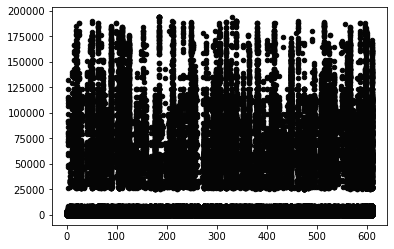

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.spatial.distance import cdist
data = pd.read_csv('ratings.csv')
print(data.shape)

f1 = data['userId'].values
f2 = data['movieId'].values
X = np.array(list(zip(f1,f2)))

k = 2

C_x = np.random.randint(0,np.max(X)-20, size=k)
C_y = np.random.randint(0,np.max(X)-20, size=k)
C = np.array(list(zip(C_x,C_y)), dtype=np.float32)
plt.scatter(f1,f2, c='#050505',s =20)

In [48]:
############## LIGHTFM LIBRARY HYBRID RECOMMENDER (RATINGS RECOMMENDATION)#####################

In [49]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

In [50]:
data=fetch_movielens(min_rating=4.0)
data1=fetch_movielens(min_rating=0.0)
# print(data)
# print(data1)

In [51]:
print(repr(data['train']))
print(repr(data['test']))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 5469 stored elements in COOrdinate format>


In [52]:
data['item_feature_labels']

model = LightFM(loss='warp')

model.fit(data['train'], epochs=30, num_threads=2)

In [53]:
print("Welcome to the Movie Recommender System\n\n\n")
choice='Yes'
while not (choice=='No' or choice=='no' or choice=='NO'):
    user_idx=int(input('Enter your UserId:'))
    n_users, n_items = data['train'].shape

    for user_id in [user_idx]:
        known_positives = data['item_labels'][data['train'].tocsr()[user_id].indices]
        
        scores = model.predict(user_id, np.arange(n_items))
        
        top_items = data['item_labels'][np.argsort(-scores)]
        
        print("User %s" % user_id)
        print("Movie that the user rated above 4.0:\n")
        
        for x in known_positives[:5]:
            print("%s" % x)
        print("\n\n")
        print("Similiar Movies that are recommended:\n")
        
        for x in top_items[:10]:
            print("%s" % x)
        print("\n\n")
        
        ############# HISTORY OF A USER #################
        print("History of a user:")
        for user_id in [user_idx]:
            known_positives11 = data['item_labels'][data1['train'].tocsr()[user_id].indices]
            for x in known_positives11[:]:
                print("%s" % x)
        print("\n")
    print("Do you want to enter another UserId? (Press Yes or No to continue)\n")
    choice=input()
    if(choice=="no" or choice=="No" or choice=='NO'):
        break
    print("\n")

Welcome to the Movie Recommender System



Enter your UserId:11
User 11
Movie that the user rated above 4.0:

Get Shorty (1995)
Mr. Holland's Opus (1995)
Apollo 13 (1995)
Star Wars (1977)
Forrest Gump (1994)



Similiar Movies that are recommended:

Star Wars (1977)
Raiders of the Lost Ark (1981)
Return of the Jedi (1983)
Schindler's List (1993)
Silence of the Lambs, The (1991)
Braveheart (1995)
Forrest Gump (1994)
Fugitive, The (1993)
Back to the Future (1985)
Toy Story (1995)



History of a user:
Get Shorty (1995)
Mr. Holland's Opus (1995)
Apollo 13 (1995)
Star Wars (1977)
Forrest Gump (1994)
Lion King, The (1994)
Sleepless in Seattle (1993)
Silence of the Lambs, The (1991)
Godfather, The (1972)
Gone with the Wind (1939)
Platoon (1986)
Basic Instinct (1992)
Top Gun (1986)
Monty Python and the Holy Grail (1974)
Cinema Paradiso (1988)
Raiders of the Lost Ark (1981)
Amadeus (1984)
Terminator, The (1984)
Dead Poets Society (1989)
Shining, The (1980)
Groundhog Day (1993)
Unforgiven (1992

In [55]:
import time
choicex=input("Do you want to generate personalized report?\n\n")
print("FETCHING DATA FROM CLOUD STORAGE...............\n")
time.sleep(5)
print("Generating..........Please wait")
if(choicex=='yes' or choicex=='YES' or choicex=='Yes'):
    from fpdf import FPDF
    from datetime import datetime
    from datetime import date
    now = datetime.now()

    pdf = FPDF()
    pdf.add_page()
    pdf.image(name='stamp.png', x = 50, y = 100, w = 130, h = 100, type = 'png')
    pdf.line(10, 10, 10, 500)
    pdf.set_line_width(1)
    pdf.set_draw_color(255, 0, 0)
    pdf.line(5, 20, 200, 20)
    pdf.set_font("Courier",'IB', size=20)
    pdf.cell(200, 10, txt="Movie Recommendation System" , ln=1, align="C")
    pdf.set_font("Courier", size=8)
    pdf.cell(200, 10, txt= "Created at: " + str(now),ln=0.01, align="L")
    #pdf.cell(0, 10, txt="By: Avantika, Swarika and Apurva", ln=1, align="R")
    pdf.set_font("Courier",'IB', size=18)
    pdf.cell(0, 10, txt= "***Detailed user report for the userid: "+ str(user_idx) + "***",ln=1, align="C")

    pdf.set_font("Courier",'IB', size=14)
    pdf.cell(0,10,txt='Movies that the user rated above 4.0:',ln=1,align="C")
    pdf.set_font("Courier", size=12)
    for i in range(5):
        pdf.cell(0,5,txt=str(known_positives[i]) + "\n",ln=100,align="C")

    pdf.set_font("Courier",'IB', size=14)
    pdf.cell(0,10,txt='Similiar Movies that are recommended:',ln=1,align="C")
    pdf.set_font("Courier", size=12)
    for i in range(5):
        pdf.cell(0,5,txt=str(top_items[i]) + "\n",ln=100,align="C")

    pdf.set_font("Courier",'IB', size=14)
    pdf.cell(0,10,txt='History of the user:',ln=1,align="C")
    pdf.set_font("Courier", size=12)
    for i in range(len(known_positives11)):
        pdf.cell(0,5,txt=str(known_positives11[i]) + "\n",ln=100,align="C")

    today=date.today()
    pdf.output("Movie_Rec Analytical Reports/user_report#{}.pdf".format(user_id))
    print("Success")

Do you want to generate personalized report?

yes
FETCHING DATA FROM CLOUD STORAGE...............

Generating..........Please wait
Success


In [56]:
#### TRENDING MOVIES IN A WEEK/ 2 WEEKS/ A MONTH ####

In [57]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)

In [58]:
#rat= (ratings['timestamp']>1537194450) & (ratings['timestamp']<=1537799250) #week
#rat= (ratings['timestamp']>1536589650) & (ratings['timestamp']<=1537799250) #2weeks
rat= (ratings['timestamp']>1535120850) & (ratings['timestamp']<=1537799250) #month

In [59]:
ratings_=ratings.loc[rat]

In [60]:
ratngs=ratings_['movieId'].mode()
ratings__=ratngs.values.tolist()
ratings__

['Avengers: Infinity War - Part I (2018)',
 'Black Panther (2017)',
 'Dark Knight Rises, The (2012)',
 'Dark Knight, The (2008)',
 'Deadpool 2 (2018)',
 'Inception (2010)',
 'Thor: Ragnarok (2017)']

In [61]:
#ratings_['movieId'].value_counts()

In [62]:
ratings_['movieId'].value_counts().idxmax()

'Inception (2010)'

In [64]:
import time
choicex=input("Do you want to generate personalized report?\n\n")
print("FETCHING DATA FROM CLOUD STORAGE...............\n")
time.sleep(5)
print("Generating..........Please wait")
if(choicex=='yes' or choicex=='YES' or choicex=='Yes'):
    from fpdf import FPDF
    from datetime import datetime
    from datetime import date
    now = datetime.now()
    today=date.today()

    pdf = FPDF()
    pdf.add_page()

    pdf.line(10, 10, 10, 500)
    pdf.set_line_width(1)
    pdf.set_draw_color(255, 0, 0)
    pdf.line(5, 20, 200, 20)
    pdf.set_font("Courier",'IB', size=20)
    pdf.cell(200, 10, txt="Movie Recommendation System" , ln=1, align="C")
    pdf.set_font("Courier", size=8)
    pdf.cell(200, 10, txt= "Created at: " + str(now),ln=0.01, align="L")
    #pdf.cell(0, 10, txt="By: Avantika, Swarika and Apurva", ln=1, align="R")
    pdf.set_font("Courier",'IB', size=14)
    pdf.cell(0, 10, txt= "***Trending movies in "+ today.strftime("%B") + "***",ln=1, align="C")

    pdf.set_font("Courier", size=12)
    for i in range(len(ratings__)):
        pdf.cell(0,5,txt=str(ratings__[i]) + "\n",ln=100,align="C")
    today=date.today()
    pdf.output("Movie_Rec Analytical Reports/movie_rec#{}.pdf".format(today.strftime("%B")))
    print("Success")






Do you want to generate personalized report?

yes
FETCHING DATA FROM CLOUD STORAGE...............

Generating..........Please wait
Success


In [ ]:
######## TRENDING MOVIES BASED ON PEARSON COEFFICIENT (Ratings based) #######

In [65]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
ratings = pd.read_csv("ratings.csv")
ratings.drop(['timestamp'], axis=1, inplace=True)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [67]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)

In [68]:
ratings.head()

,userId,movieId,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


In [69]:
M = ratings.pivot_table(index=['userId'],columns=['movieId'],values='rating')

In [70]:
M.shape

(610, 9719)

In [71]:
M

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [72]:
def pearson(s1,s2):
    s1_c = s1-s1.mean()
    s2_c = s2-s2.mean()
    return np.sum(s1_c*s2_c)/np.sqrt(np.sum(s1_c**2)*np.sum(s2_c**2))

In [73]:
pearson(M['\'burbs, The (1989)'] , M['10 Things I Hate About You (1999)'])

0.1096435895189748

In [74]:
pearson(M['(500) Days of Summer (2009)'] , M['\'burbs, The (1989)'])

0.0521082999258014

In [75]:
def get_recs(movie_name, M, num):
    import numpy as np
    reviews=[]
    for title in M.columns:
        if title == movie_name:
            continue
        cor=pearson(M[movie_name], M[title])
        if np.isnan(cor):
            continue
        else:
            reviews.append((title,cor))
    reviews.sort(key=lambda tup: tup[1], reverse=True)
    return reviews [:num]

In [76]:
recs=get_recs('Clerks (1994)', M , 100)

In [77]:
recs[:10]

[('Endless Summer, The (1966)', 0.3181483447381212),
 ('Passengers (2016)', 0.30948004016807185),
 ('Lords of Dogtown (2005)', 0.30899603201034065),
 ('Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lenders (2006)',
  0.2943460409012341),
 ('Four Weddings and a Funeral (1994)', 0.2930123765837922),
 ('Young Guns (1988)', 0.2879176078379636),
 ('Away We Go (2009)', 0.267672436591638),
 ('Leatherheads (2008)', 0.2583465083317928),
 ('Affair of the Necklace, The (2001)', 0.2575527857885798),
 ('Grumpier Old Men (1995)', 0.25668230747287346)]

In [78]:
anti_recs= get_recs('Clerks (1994)', M , 8551)

In [79]:
anti_recs[-10:]

[('Ugly Truth, The (2009)', -0.23280476175873568),
 ('Bobby (2006)', -0.23366855318018862),
 ('Captain Ron (1992)', -0.23388540082056508),
 ('After the Sunset (2004)', -0.23508725180641385),
 ('Submarine (2010)', -0.2385523529067113),
 ('Dangerous Beauty (1998)', -0.2474487125740942),
 ('Ninja Assassin (2009)', -0.24878347707471116),
 ('Waitress (2007)', -0.2495571044094368),
 ('Flash Gordon Conquers the Universe (1940)', -0.2575527857885798),
 ('Jaws: The Revenge (1987)', -0.2617082663713414)]